<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expressions-for-the-axisymmetric-tokamak" data-toc-modified-id="Expressions-for-the-axisymmetric-tokamak-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Expressions for the axisymmetric tokamak</a></span></li><li><span><a href="#Reduced-Hamiltonian-for-axisymmetric-toy-tokamak" data-toc-modified-id="Reduced-Hamiltonian-for-axisymmetric-toy-tokamak-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reduced Hamiltonian for axisymmetric toy tokamak</a></span><ul class="toc-item"><li><span><a href="#Solving-using-symbolic-expression-(WIP!)" data-toc-modified-id="Solving-using-symbolic-expression-(WIP!)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Solving using symbolic expression (WIP!)</a></span></li></ul></li><li><span><a href="#Non-axisymmetric-toy-tokamak" data-toc-modified-id="Non-axisymmetric-toy-tokamak-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Non-axisymmetric toy tokamak</a></span><ul class="toc-item"><li><span><a href="#Case-I:-perturbation-to-the-vector-potential-in-the-form-$A_{\phi}-=-f(R,\phi,z)$" data-toc-modified-id="Case-I:-perturbation-to-the-vector-potential-in-the-form-$A_{\phi}-=-f(R,\phi,z)$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Case I: perturbation to the vector potential in the form $A_{\phi} = f(R,\phi,z)$</a></span></li><li><span><a href="#Checking-the-above-expression-when-$\epsilon-=-0$" data-toc-modified-id="Checking-the-above-expression-when-$\epsilon-=-0$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Checking the above expression when $\epsilon = 0$</a></span></li></ul></li><li><span><a href="#Evaluating-the-expression-and-numerical-calculations" data-toc-modified-id="Evaluating-the-expression-and-numerical-calculations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluating the expression and numerical calculations</a></span></li></ul></div>

In [1]:
import numpy as np
import sympy

import matplotlib.pyplot as plt

from importlib import reload  # Python 3.4+
import toy_tokamak
reload(toy_tokamak)


<module 'toy_tokamak' from '/Users/OptimusPrime/Documents/magnetic-mirror/toy-tokamak/src/toy_tokamak.py'>

## Expressions for the axisymmetric tokamak

In [2]:

r, R, phi, z, C, R0 = sympy.symbols('r, R, phi, z, C, R0')

axisymFieldExp = np.array([-z/R, C/R, (R - R0)/R])

axisymFieldMagExp = sympy.sqrt(C**2 + (z**2 + (R - R0)**2))/R

axisymGradFieldMagExp = [sympy.diff(axisymFieldMagExp,R), \
                   sympy.diff(axisymFieldMagExp,phi)/R, \
                   sympy.diff(axisymFieldMagExp,z)] 

modBprime = np.dot(axisymFieldExp/axisymFieldMagExp,axisymGradFieldMagExp)

gradModBPrime = [sympy.diff(modBprime,R), sympy.diff(modBprime,phi)/R, \
                 sympy.diff(modBprime,z)] 

modBDoubleprime = np.dot(axisymFieldExp/axisymFieldMagExp,gradModBPrime)

sympy.init_printing(use_latex='mathjax')

# sympy.pprint(axisymGradFieldMagExp)
# sympy.pprint(modBprime)
# sympy.simplify(axisymGradFieldMagExp)
sympy.simplify(modBprime)
# sympy.simplify(modBDoubleprime)


z 
──
 2
R 

## Reduced Hamiltonian for axisymmetric toy tokamak 

### Solving using symbolic expression (WIP!)

In [3]:
# from scipy.optimize import newton

# # mu, C, p, psi are constants
# v_par, mu, C, psi, p = sympy.symbols('v_par, mu, C, psi, p')
# full_hamiltonian = v_par**2/2 + mu*axisymFieldMagExp

# psi = (1/2)*(r**2 + z**2)


# # sympy.simplify(Hp)


# def partialHp_partialr(rGuess, parameters):
    
#     v_par, mu, C, psi, p = sympy.symbols('v_par, mu, C, psi, p')
#     #reduced_hamiltonian
#     Hp = (1/2)*((C**2 + r**2 + z**2)/(C**2*(r + R0)**2))*(p - (1/2)*(r**2 + z**2))**2 + \
#         (mu/(r + R0))*sympy.sqrt(C**2 + r**2 + z**2)
    
# #     partialHp_partialr = sympy.lambdify([r, R0, C, mu, p], sympy.diff(Hp,r), 'numpy')
    
    
#     partialHp_partialr = sympy.diff(Hp,r).subs([(R0, parameters[0]), \
#                                                    (C, parameters[1]), \
#                                                    (mu, parameters[2]), \
#                                                    (p, parameters[3]), \
#                                                   (z, 0), (r, rGuess)])

#     return partialHp_partialr


# guess = -0.5
# parameters = [1, 5.5, 2.e-4, 0.145]
# print(partialHp_partialr(guess, parameters))
# root= newton(partialHp_partialr, guess, args = (parameters,), maxiter = 200)
# print(root)

## Non-axisymmetric toy tokamak

### Case I: perturbation to the vector potential in the form $A_{\phi} = f(R,\phi,z)$

<!-- We consider $A = \left( 0, \dfrac{\epsilon z \cos \phi}{R}, 0 \right)$ as the perturbation vector potential, such that $\nabla \times A = \left( -\dfrac{\epsilon \cos \phi}{R}, 0, 0 \right)$ is the perturbation to the magnetic field. -->

We consider $A_{\epsilon} = \left( 0, \epsilon z R \cos \phi, 0 \right)$ in the covariant form as the perturbation to the vector potential, such that $\nabla \times A_{\epsilon} = \left( -\epsilon \cos \phi, 0, \dfrac{\epsilon z \cos \phi}{R} \right)$ is the perturbation to the magnetic field.

### Symbolic calculation of the expressions in the vector field

In [4]:

# mu, C, p, psi are constants
v_par, mu, C, psi, p = sympy.symbols('v_par, mu, C, psi, p')

epsilon = sympy.symbols('epsilon')
tilde_mu = sympy.symbols('\\tilde{\\mu}')
sympy.init_printing(use_latex='mathjax')

# perturbFieldExp = np.array([-z/R - epsilon*sympy.cos(phi)/R, C/R, (R - R0)/R])
# perturbFieldMagExp = sympy.sqrt(z**2 + epsilon**2*sympy.cos(phi)**2 + 2*epsilon*z*sympy.cos(phi) + C**2 + (R-R0)**2)/R


perturbFieldExp = np.array([-z/R - epsilon*sympy.cos(phi), \
                            C/R, \
                            (R - R0)/R + (epsilon*z*sympy.cos(phi))/R])

perturbFieldMagExp = sympy.sqrt((z + epsilon*R*sympy.cos(phi))**2 + C**2 + \
                                ((R - R0) + epsilon*z*sympy.cos(phi))**2)/R

gradFieldMagExp = [sympy.diff(perturbFieldMagExp,R), \
                   sympy.diff(perturbFieldMagExp,phi)/R, \
                   sympy.diff(perturbFieldMagExp,z)]

modBprime = np.dot(perturbFieldExp/perturbFieldMagExp,gradFieldMagExp)

gradModBPrime = [sympy.diff(modBprime,R), sympy.diff(modBprime,phi)/R, \
                 sympy.diff(modBprime,z)]

modBDoubleprime = np.dot(perturbFieldExp/perturbFieldMagExp,gradModBPrime)

b = perturbFieldExp/perturbFieldMagExp

curlb = [-sympy.diff(b[1],z) + sympy.diff(b[2],phi)/R, \
         sympy.diff(b[0],z) - sympy.diff(b[2],R), \
         b[1]/R - sympy.diff(b[0],phi)/R + sympy.diff(b[1],R)]

curlbDotb = np.dot(curlb,b)

tilde_B = [b[0] + sympy.sqrt(tilde_mu)*v_par*curlb[0], \
           b[1] + sympy.sqrt(tilde_mu)*v_par*curlb[1], \
           b[2] + sympy.sqrt(tilde_mu)*v_par*curlb[2]]

tilde_B_par = np.dot(tilde_B, b)

b_cross_grad_modB = np.cross(b, gradFieldMagExp)

tilde_B_dot_grad_modB = np.dot(tilde_B, gradFieldMagExp)

# sympy.pprint(gradFieldMagExp)
# sympy.pprint(modBprime)
# sympy.simplify(perturbFieldMagExp)
# sympy.simplify(sympy.simplify(modBprime))
# sympy.simplify(modBDoubleprime)
# sympy.simplify(curlb[0])
# sympy.simplify(curlbDotb)
# sympy.simplify(tilde_B_par)
# sympy.simplify(b_cross_grad_modB)
sympy.simplify(tilde_B_dot_grad_modB)


                                                                  3  2                                  
 2  2             2        2   _____________                   C⋅R ⋅ε ⋅sin(2⋅φ)        2                
C ⋅R ⋅ε⋅cos(φ) + C ⋅R⋅z + C ⋅╲╱ \tilde{\mu} ⋅ε⋅vₚₐᵣ⋅z⋅sin(φ) - ──────────────── - 2⋅C⋅R ⋅ε⋅z⋅sin(φ) + C⋅
                                                                      2                                 
────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                        
                                                                                                        

                       2  2                                                3   _____________  2         
                  C⋅R⋅ε ⋅z ⋅sin(2⋅φ)      4               3               R ⋅╲╱ \tilde{\mu} ⋅ε ⋅vₚₐᵣ⋅sin
R⋅R₀⋅ε⋅z⋅sin(φ) - ────────────────── + 2⋅R ⋅ε⋅cos(φ) -

### Checking the above expression when $\epsilon = 0$

Evaluating the expression and numerical calculations

In [5]:
sympy.simplify(modBprime.subs([(epsilon, 0.0)]))

z 
──
 2
R 

In [6]:
sympy.simplify(modBDoubleprime.subs([(epsilon, 0.0)]))

           2             2         
          R  - R⋅R₀ + 2⋅z          
───────────────────────────────────
      _____________________________
 3   ╱  2    2              2    2 
R ⋅╲╱  C  + R  - 2⋅R⋅R₀ + R₀  + z  

In [7]:
sympy.simplify(curlbDotb.subs([(epsilon, 0.0)]))

          C⋅(-R - R₀)          
───────────────────────────────
  ⎛ 2    2              2    2⎞
R⋅⎝C  + R  - 2⋅R⋅R₀ + R₀  + z ⎠

### Defining the vector field and checking the symbolic expressions

In [8]:
from sympy import lambdify

lambda_modB = lambdify(([R, phi, z], [R0, C, epsilon]), perturbFieldMagExp, 'numpy')

lambda_b = lambdify(([R, phi, z, v_par], [R0, C, epsilon, tilde_mu]), b, 'numpy')

lambda_tilde_B = lambdify(([R, phi, z, v_par], [R0, C, epsilon, tilde_mu]), tilde_B, 'numpy')

lambda_b_cross_grad_modB = lambdify(([R, phi, z, v_par], [R0, C, epsilon, tilde_mu]), b_cross_grad_modB, 'numpy')

lambda_tilde_B_par = lambdify(([R, phi, z, v_par], [R0, C, epsilon, tilde_mu]), tilde_B_par, 'numpy')

lambda_tilde_B_dot_grad_modB = lambdify(([R, phi, z, v_par], [R0, C, epsilon, tilde_mu]), tilde_B_dot_grad_modB, 'numpy')

### Numerical evaluation of the sympy expressions

In [9]:
def fgcm_vectorfield(t, coords, *field_parameters):
    """
    Returns the first-order GCM vector field for the toy tokamak
    
    Parameters
    ----------
    t : scalar
    time-like independent variable
    
    coords : ndarray of size (1, 4)
    [GC position in cylindrical coordinates, parallel velocity] 
    
    Returns
    -------
    out : ndarray of size (4, 1)
    d[GC position in 3D, parallel velocity]/dt
    """
    
    R, phi, z, v_par = coords
    R0, C, epsilon, tilde_mu = field_parameters
    
    denominator = lambda_tilde_B_par(coords, [R0, C, epsilon, tilde_mu])
    
    dRdt = (v_par * lambda_tilde_B(coords, [R0, C, epsilon, tilde_mu])[0] 
            + tilde_mu * lambda_b(coords, [R0, C, epsilon, tilde_mu])[0] 
            * lambda_b_cross_grad_modB(coords, [R0, C, epsilon, tilde_mu])[0]) / denominator
    
    dphidt = (v_par * lambda_tilde_B(coords, [R0, C, epsilon, tilde_mu])[1]
            + tilde_mu * lambda_b(coords, [R0, C, epsilon, tilde_mu])[1] 
            * lambda_b_cross_grad_modB(coords, [R0, C, epsilon, tilde_mu])[1]) / (coords[0] * denominator)
    
    dzdt = (v_par * lambda_tilde_B(coords, [R0, C, epsilon, tilde_mu])[2]
            + tilde_mu * lambda_b(coords, [R0, C, epsilon, tilde_mu])[2] 
            * lambda_b_cross_grad_modB(coords, [R0, C, epsilon, tilde_mu])[2]) / denominator
    
    dv_pardt = - lambda_tilde_B_dot_grad_modB(coords, [R0, C, epsilon, tilde_mu]) / denominator
    
    return np.array([dRdt, dphidt, dzdt, dv_pardt])

In [53]:

coords = [1.2, 0.1, 0.1, 0.1]

# R0, C, epsilon, tilde_mu
field_parameters = [1, 5.5, 0.5, 0.0001]

print(lambda_tilde_B(coords, field_parameters))

print(lambda_b_cross_grad_modB(coords, field_parameters))

print(lambda_tilde_B_par(coords, field_parameters))

print(lambda_tilde_B_dot_grad_modB(coords, field_parameters))

print(fgcm_vectorfield(0.1, coords, *field_parameters))



[-0.12556909775552835, 0.9907042027566817, 0.045801027770635695]
[ 0.12245971 -0.15391825  3.73134854]
0.9996796928758752
0.47300062425392897
[-0.01256247  0.08257242  0.00459837 -0.47315218]


In [54]:
def intersect_poloidal_plane_cyl(t, y, *field_parameters):
    """
    Compute intersection of fieldlines with a poloidal plane defined
    by phi = constant where phi is the toroidal coordinate.
    """
    # return (y[1] % 2*np.pi)
    return np.arccos(np.cos(y[1])) - np.pi/2
intersect_poloidal_plane_cyl.terminal = False
intersect_poloidal_plane_cyl.direction = 0

def evalute_phidot(sol, field_parameters):
    """
    Returns phidot for a trajectory computed using solve ivp
    """
    
    R0, C, epsilon, tilde_mu = field_parameters
    dphidt = np.zeros((sol.t_events[0].shape[0],1))
    
    for i in range(len(sol.t_events[0])):
        
        R, phi, z, v_par = sol.y_events[0][i]
        
        denominator = lambda_tilde_B_par([R, phi, z, v_par], [R0, C, epsilon, tilde_mu])
        
        dphidt[i] = (v_par * lambda_tilde_B([R, phi, z, v_par], [R0, C, epsilon, tilde_mu])[1]
                + tilde_mu * lambda_b([R, phi, z, v_par], [R0, C, epsilon, tilde_mu])[1] 
                * lambda_b_cross_grad_modB([R, phi, z, v_par], [R0, C, epsilon, tilde_mu])[1]) / (R * denominator)
    
    return dphidt

In [58]:
%%time

from scipy.integrate import solve_ivp

# R0, C, epsilon, tilde_mu
field_parameters = [1, 5.5, 0.6, 0.0001]
scaled_energy = 7.4

# gc_coords = [1.01, np.pi/2, 0.01] # in toroidal coordinates: R, phi, z
gc_coords = [1.1, np.pi/2, 0.2] 
time_span = [0, 400]

scaled_par_vel = np.sqrt(2*(scaled_energy - lambda_modB(gc_coords, field_parameters[:3])))
y0 = np.append(gc_coords, scaled_par_vel)
# print(y0)

sol = solve_ivp(fgcm_vectorfield, time_span, y0, args=field_parameters, \
                events = intersect_poloidal_plane_cyl, \
                dense_output = True, rtol=1e-10)


phidot_events = evalute_phidot(sol, field_parameters)

CPU times: user 7.59 s, sys: 31.6 ms, total: 7.62 s
Wall time: 7.79 s


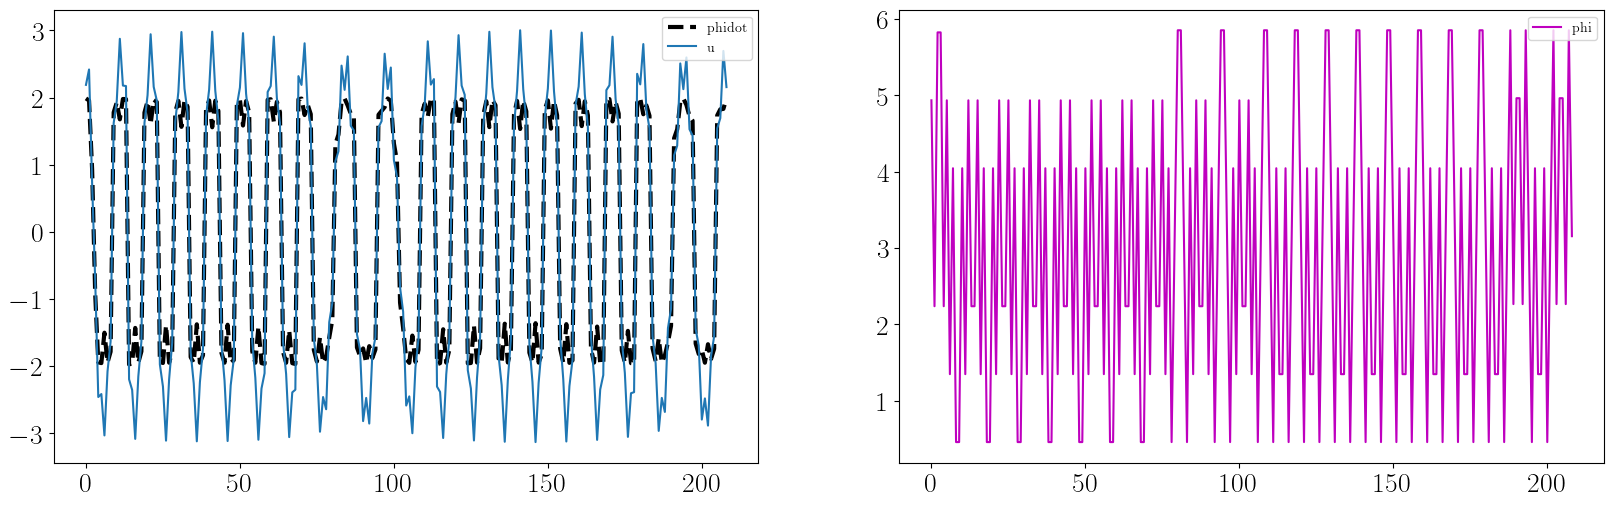

In [59]:
%matplotlib inline

fig = plt.figure(figsize=(20,6), dpi=100)
ax1 = fig.add_subplot(121)
ax1.plot(phidot_events, '--k', lw=3, label='phidot')
ax1.plot(sol.y_events[0][:,3], label='u')
ax1.legend(loc='upper right')
# ax.plot(sol.t, sol.y[1,:])
# ax.plot(np.transpose(sol.t_events), np.squeeze(sol.y_events)[:,1],'.k')

ax2 = fig.add_subplot(122)
ax2.plot(sol.y_events[0][:,1] % 2*np.pi, '-m', label='phi')
ax2.legend(loc='upper right')

plt.show()

In [60]:
%matplotlib
import matplotlib.pyplot as plt

dtEval = 0.01
tEval = np.arange(sol.t[0], sol.t[-1] + dtEval, dtEval)
solEval = sol.sol(tEval)

sol_events = np.squeeze(np.array(sol.y_events))
print(f'Number of crossings of the poloidal plane: {sol_events.shape[0]}')

# cylindrical to cartesian coordinates
sol_cart = [solEval[0,:] * np.cos(solEval[1,:]), \
            solEval[0,:] * np.sin(solEval[1,:]), \
            solEval[2,:]]

# 3d view of the orbit
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(sol_cart[0], sol_cart[1], sol_cart[2], '-b', lw = 1)
ax.plot3D(sol_cart[0][0], sol_cart[1][0], sol_cart[2][0], 'xg', ms=10, lw=2)
ax.plot3D(sol_cart[0][-1], sol_cart[1][-1], sol_cart[2][-1], 'xr', ms=10, lw=2)
ax.plot3D(sol_events[:,0] * np.cos(sol_events[:,1]), \
          sol_events[:,0] * np.sin(sol_events[:,1]), sol_events[:,2], '.k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_zlim([-1,1])
ax.view_init(20,-120)
plt.show()


Using matplotlib backend: MacOSX
Number of crossings of the poloidal plane: 209


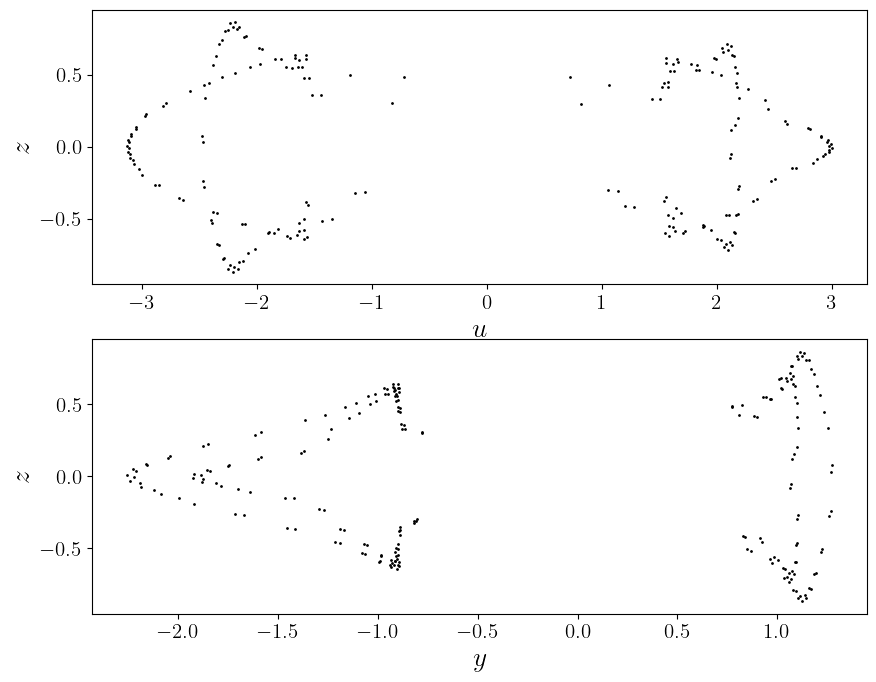

In [61]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    # "font.serif": ["Palatino"],
    "font.serif": ["Helevetica"],
})

tick_labelsize = 15 
axes_labelsize = 20
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

figEvents = plt.figure(figsize=(10,8), dpi=100)
ax1 = figEvents.add_subplot(211)
ax1.plot(sol_events[:,3], sol_events[:,2], '.k', ms=2)
ax1.set_xlabel(r'$u$')
ax1.set_ylabel(r'$z$')

ax2 = figEvents.add_subplot(212)
ax2.plot(sol_events[:,0] * np.sin(sol_events[:,1]), sol_events[:,2], '.k', ms=2)
ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$z$')
plt.show()



### Generate points on a poloidal plane for Poincare section.

In [62]:
%%time
from toy_tokamak import points_poloidal_plane

time_span = [0, 400]

# R, phi, z, u
resolution = [10, 10, 10, 10]

major_radius = 1 #R0
minor_radius = 0.2 #r0
range_Rz = [-0.4, 0.4, -minor_radius + major_radius, minor_radius + major_radius]

mesh_R, mesh_z = points_poloidal_plane([resolution[0], resolution[2]], range_Rz)

grid_u = np.linspace(-3, 3, resolution[3]+1) # scaled parallel velocity

# fig = plt.figure(figsize=(7,7), dpi = 100)
# ax = fig.add_subplot()
# plt.plot(mesh_R, mesh_z, '.k', ms = 1)
# ax.set_xlabel(r'$R$')
# ax.set_ylabel(r'$z$')

poincare_sect_fieldlines = np.array([])

# Solve the odes in the (R, phi, z, u) coordinates
for (R, z) in zip(mesh_R.flatten(), mesh_z.flatten()):
# for z in np.linspace(-0.4,0.4,0.01):
    # for u in grid_u:
    y0 = [R, np.pi/2.0, z, np.NaN]
    
    y0[-1] = np.sqrt(2*(scaled_energy - lambda_modB(y0[:-1], field_parameters[:3])))
    sol = solve_ivp(fgcm_vectorfield, time_span, y0, args=field_parameters, \
                        events = intersect_poloidal_plane_cyl, \
                        dense_output = True, rtol=1e-8)

    sol_events = np.squeeze(np.array(sol.y_events))
    print(f'Number of crossings of the poloidal plane: {sol_events.shape[0]}')

    if sol.t_events[0].size != 0:
        if poincare_sect_fieldlines.size == 0:
            poincare_sect_fieldlines = np.append(np.reshape(sol.t_events[0][1:], 
                                                            (len(sol.t_events[0][1:]),1)), \
                                                             sol.y_events[0][1:], axis = 1)
        else:
            poincare_sect_fieldlines = np.concatenate((poincare_sect_fieldlines, \
                                    np.append(np.reshape(sol.t_events[0][1:], (len(sol.t_events[0][1:]),1)), \
                                    sol.y_events[0][1:], axis = 1)), axis = 0)
            
    
    y0[-1] = -y0[-1]
    sol = solve_ivp(fgcm_vectorfield, time_span, y0, args=field_parameters, \
                        events = intersect_poloidal_plane_cyl, \
                        dense_output = True, rtol=1e-8)
    
    sol_events = np.squeeze(np.array(sol.y_events))
    print(f'Number of crossings of the poloidal plane: {sol_events.shape[0]}')
    
    # print(sol.t_events[0].shape[0])
    
    if sol.t_events[0].size != 0:
        if poincare_sect_fieldlines.size == 0:
            poincare_sect_fieldlines = np.append(np.reshape(sol.t_events[0][1:], 
                                                            (len(sol.t_events[0][1:]),1)), \
                                                             sol.y_events[0][1:], axis = 1)
        else:
            poincare_sect_fieldlines = np.concatenate((poincare_sect_fieldlines, \
                                    np.append(np.reshape(sol.t_events[0][1:], (len(sol.t_events[0][1:]),1)), \
                                    sol.y_events[0][1:], axis = 1)), axis = 0)

    

Number of crossings of the poloidal plane: 204
Number of crossings of the poloidal plane: 194
Number of crossings of the poloidal plane: 210
Number of crossings of the poloidal plane: 193
Number of crossings of the poloidal plane: 207
Number of crossings of the poloidal plane: 196
Number of crossings of the poloidal plane: 204
Number of crossings of the poloidal plane: 192
Number of crossings of the poloidal plane: 153
Number of crossings of the poloidal plane: 189
Number of crossings of the poloidal plane: 176
Number of crossings of the poloidal plane: 196
Number of crossings of the poloidal plane: 200
Number of crossings of the poloidal plane: 177
Number of crossings of the poloidal plane: 209
Number of crossings of the poloidal plane: 163
Number of crossings of the poloidal plane: 210
Number of crossings of the poloidal plane: 164
Number of crossings of the poloidal plane: 197
Number of crossings of the poloidal plane: 191
Number of crossings of the poloidal plane: 180
Number of cro

### Saving the file as ASCII file

In [63]:
with open(f'data_{field_parameters}.txt', 'wb') as f:
    np.savetxt(f, poincare_sect_fieldlines, fmt='%1.4e')

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    # "font.serif": ["Palatino"],
    "font.serif": ["Helevetica"],
})

tick_labelsize = 20 
axes_labelsize = 35
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

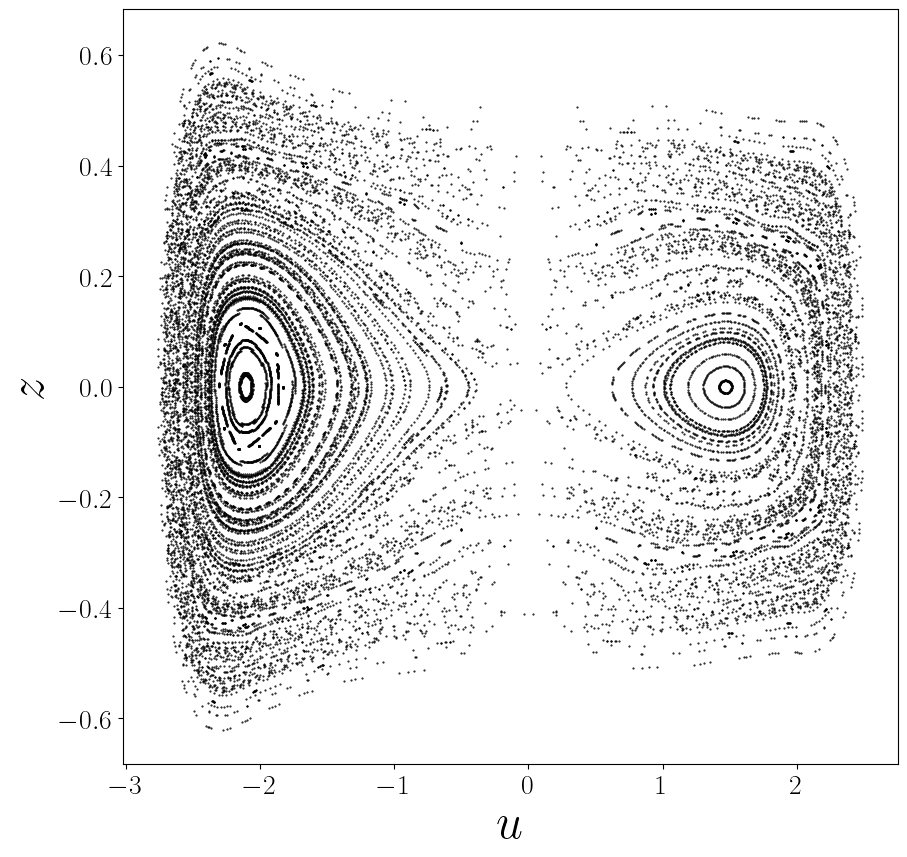

In [80]:
field_parameters = [1, 5.5, 0.2, 0.0001]

with open(f'data_{field_parameters}.txt', 'r') as f:
    poincare_sect_fieldlines = np.loadtxt(f)

# %time
# fig = plt.figure(figsize=(10,5), dpi=100)
# ax = fig.add_subplot(211)
# ax.plot(poincare_sect_fieldlines[:1000,0],'.r')

# ax = fig.add_subplot(212)
# ax.plot(poincare_sect_fieldlines[:500,0], poincare_sect_fieldlines[:500,2],'.r')
# plt.show()

# Only plot points with y > 0
idx_y_pos = np.where(poincare_sect_fieldlines[:,1] * np.sin(poincare_sect_fieldlines[:,2]) > 0)
# ax = fig.add_subplot(111)
# ax.plot(poincare_sect_fieldlines[idx_y_pos,1] * np.sin(poincare_sect_fieldlines[idx_y_pos,2]), poincare_sect_fieldlines[idx_y_pos,3],'.r')
# plt.show()


fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(111)
# ax.plot(poincare_sect_fieldlines[:,4], poincare_sect_fieldlines[:,3], '.k', ms=1)
ax.plot(poincare_sect_fieldlines[idx_y_pos,4], poincare_sect_fieldlines[idx_y_pos,3], '.k', ms=1)
ax.set_xlabel(r'$u$')
ax.set_ylabel(r'$z$')
# ax.set_xlim([-3, 3])
# ax.set_ylim([-2, 2])
# ax.set_aspect('equal')
plt.savefig(f"poincare_section_{field_parameters}.png", dpi=200, bbox_inches="tight")
plt.show()
